# Data visualizations using R

## Customizing `ggplot` graphs #1

So far, we have used aesthetic mappings and fixed aesthetic values to change visual elements of our graphs. In this section, we will modify elements such as the axis limits, labels and legend. 

<br>
Let's start by loading our graph from the previous section.

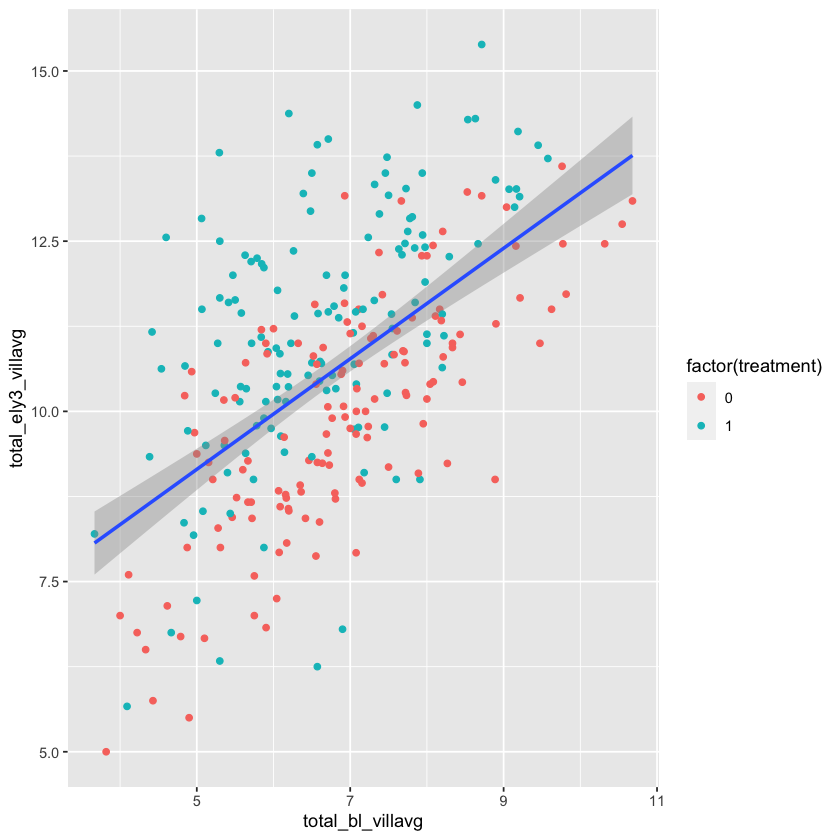

In [2]:
library('tidyverse')

mydata <- read_csv("~/Dropbox (IDinsight)/Data visualization library/Data/EG_DIB.csv", show_col_types = FALSE)
mydata$district <- factor(sample.int(3, nrow(mydata), replace = T))

plot1 <- ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)
plot1

In `ggplot`, visual modifications are split between data and non-data elements. This is not the easiest distinction to put in words. But let's say we are modifying the x-axis labels. Changing the labels themselves would be considered a data element visual change. But if we change the rotation of the labels, it would be considered a non-data element visual change. Non-data element visual modifications require the use of the `theme()` function; more on that later. 

### Data elements 

#### Graph and axis titles 
[`labs`](https://ggplot2.tidyverse.org/reference/labs.html)

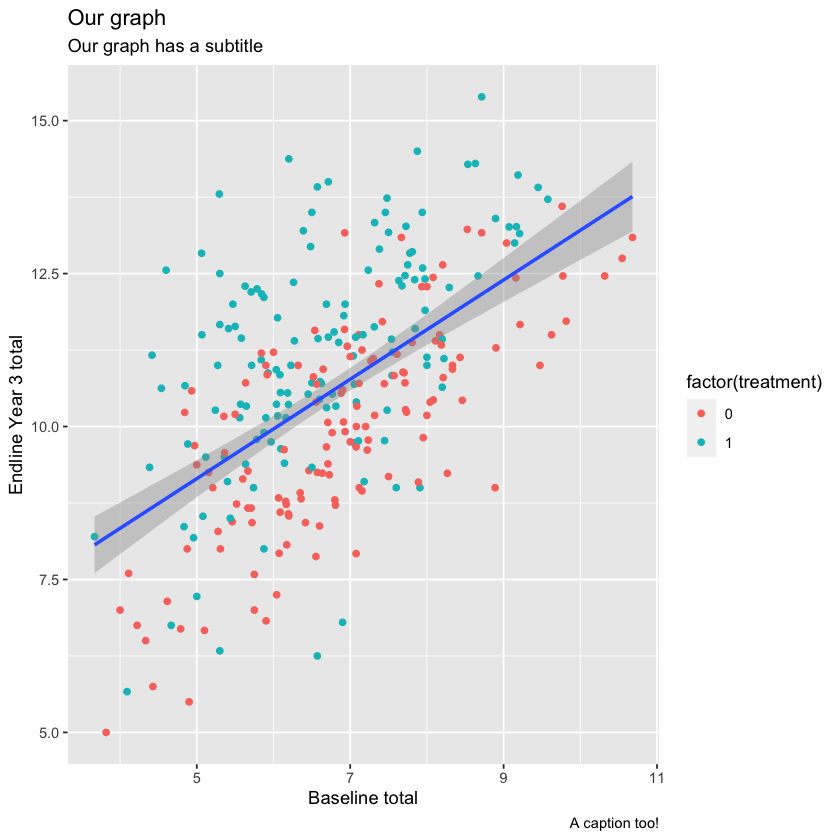

In [46]:
plot2 <- plot1 +
        labs(title = "Our graph",
             subtitle = "Our graph has a subtitle",
             caption = "A caption too!",
             x = "Baseline total",
             y = "Endline Year 3 total")
plot2

#### Axis labels
[`scale_x_continous`](https://ggplot2.tidyverse.org/reference/scale_continuous.html) and [`scale_y_continuous`](https://ggplot2.tidyverse.org/reference/scale_continuous.html)    
Note that our x and y axis variables are both *continuous*, that is, the variables have values such as 5.2, 7.8, 9.9, etc. This requires us to use the *continuous* form of the parameters. If our x (or y) variable was discrete (categorical, such as caste or religion), we would need to use [`scale_x_discrete`](https://ggplot2.tidyverse.org/reference/scale_discrete.html) (or [`scale_y_discrete`](https://ggplot2.tidyverse.org/reference/scale_discrete.html)).

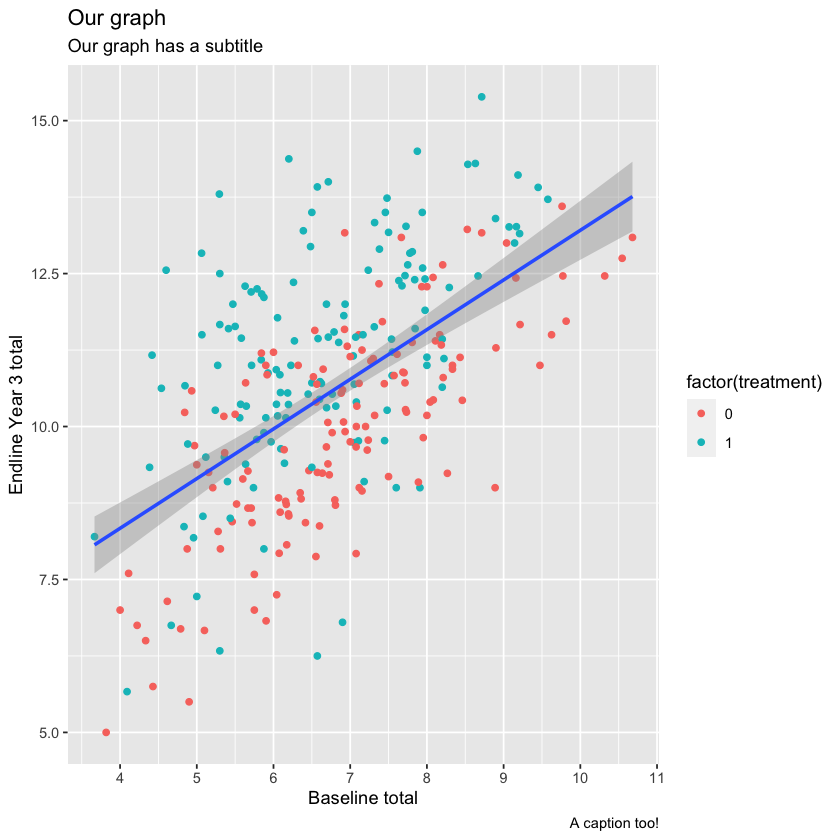

In [4]:
plot3 <- plot2 +
    scale_x_continuous(breaks = c(4, 5, 6, 7, 8, 9, 10, 11))

plot3

Writing down each label might be tedious, so we can use the [`seq`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/seq) function:

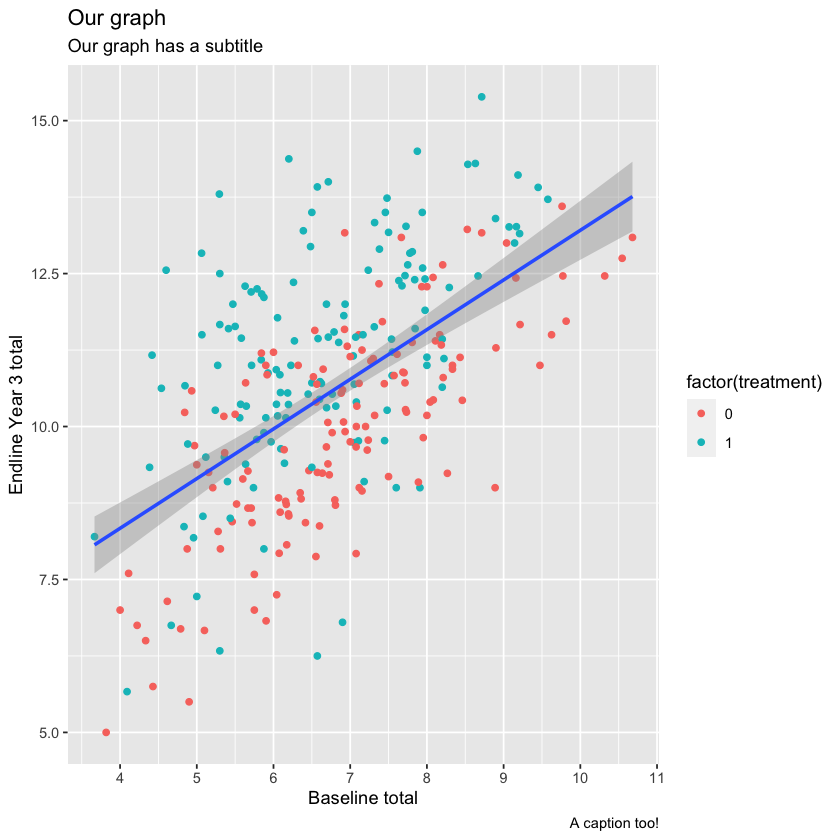

In [5]:
plot3 <- plot2 +
    scale_x_continuous(breaks = seq(from = 4, to = 11, by = 1))

plot3

We can change the axis tick labels using `labels` parameter:

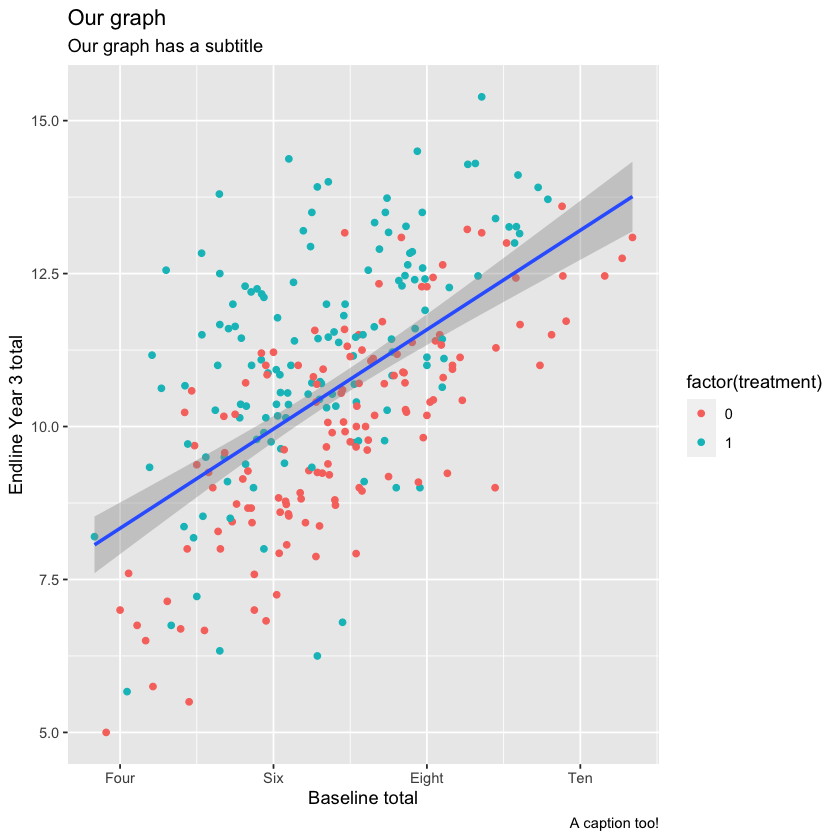

In [6]:
plot2 + 
    scale_x_continuous(breaks = seq(from = 4, to = 11, by = 2),
                       labels = c("4" = "Four",
                                  "6" = "Six",
                                  "8" = "Eight",
                                  "10" = "Ten"))


Important to note however that the number of labels should equal the number of breaks. The following code will return an error:

In [7]:
plot2 + 
    scale_x_continuous(breaks = seq(from = 4, to = 11, by = 1),
                       labels = c("4" = "Four",
                                  "6" = "Six",
                                  "8" = "Eight",
                                  "10" = "Ten"))

ERROR: [1m[33mError[39m in [1m[1m`check_breaks_labels()`:[22m
[33m![39m `breaks` and `labels` must have the same length


It doesn't make a lot of sense to show the axis labels as words:

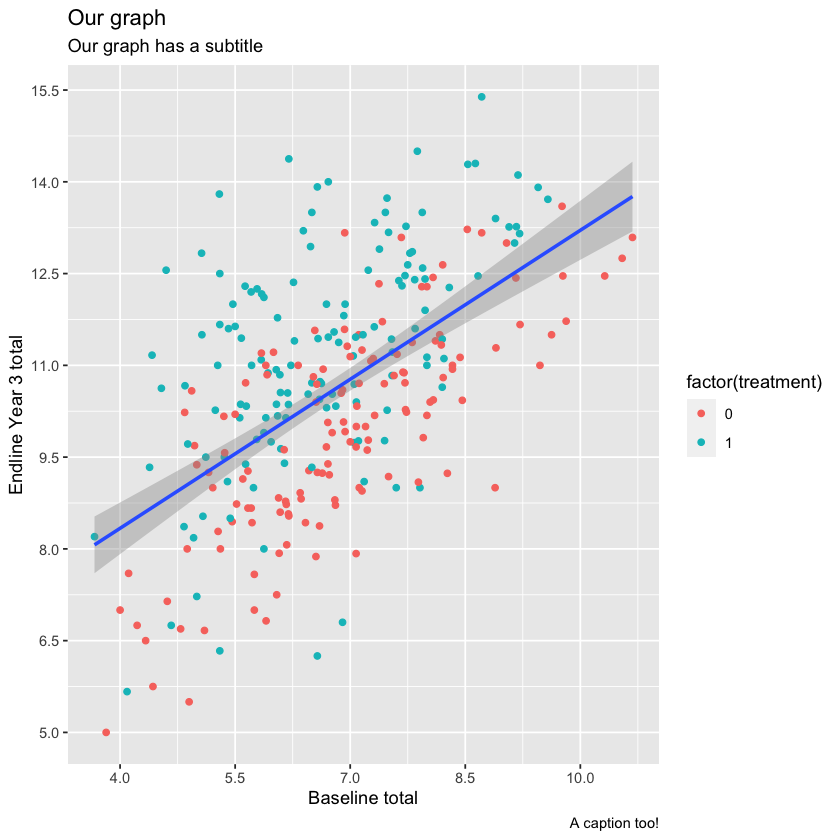

In [8]:
plot3 <- plot2 + 
        scale_x_continuous(breaks = seq(from = 4, to = 12, by = 1.5)) +
        scale_y_continuous(breaks = seq(from = 5, to = 16, by = 1.5))

plot3

#### Axis limits

Suppose we are interested in changing how much of the axis we are interested in showing. We'll discuss two ways of doing this:    

1. `xlim` and `ylim` in `coord_cartesian`
2. `limits` in `scale_x_continuous` and `scale_y_continuous`

Let's use both and see how they differ. We will limit the x-axis between 8.5 and 10 and the y-axis to 10.5 and 15.5. 
<br>
[`coord_cartesian`](https://ggplot2.tidyverse.org/reference/coord_cartesian.html)

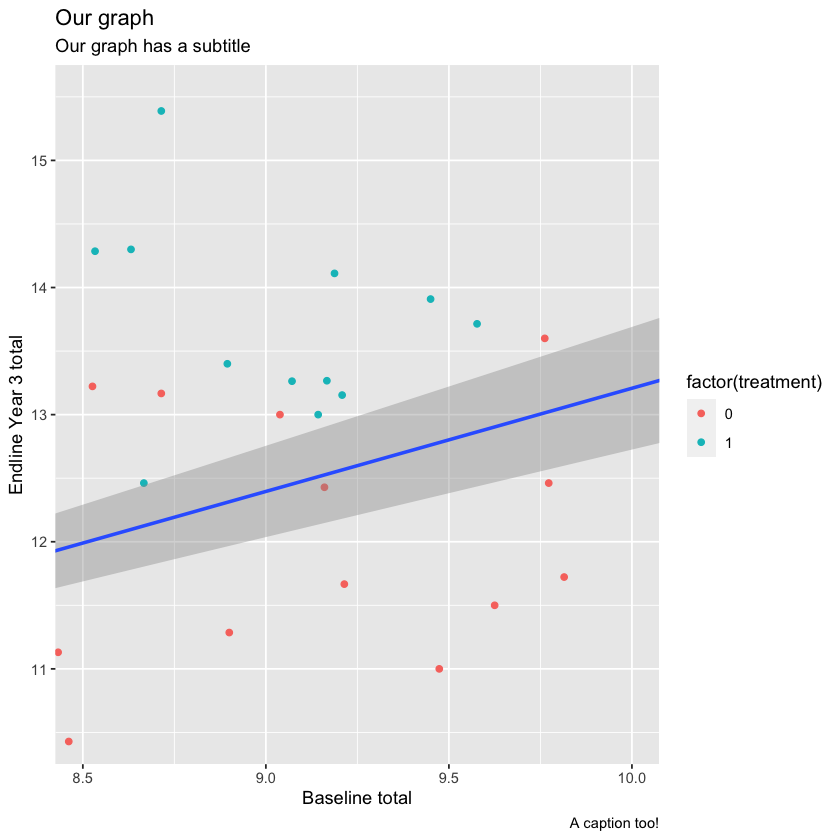

In [10]:
plot2 + 
    coord_cartesian(xlim = c(8.5, 10),
                    ylim = c(10.5, 15.5))

`scale_x_continuous` and `scale_y_continuous`

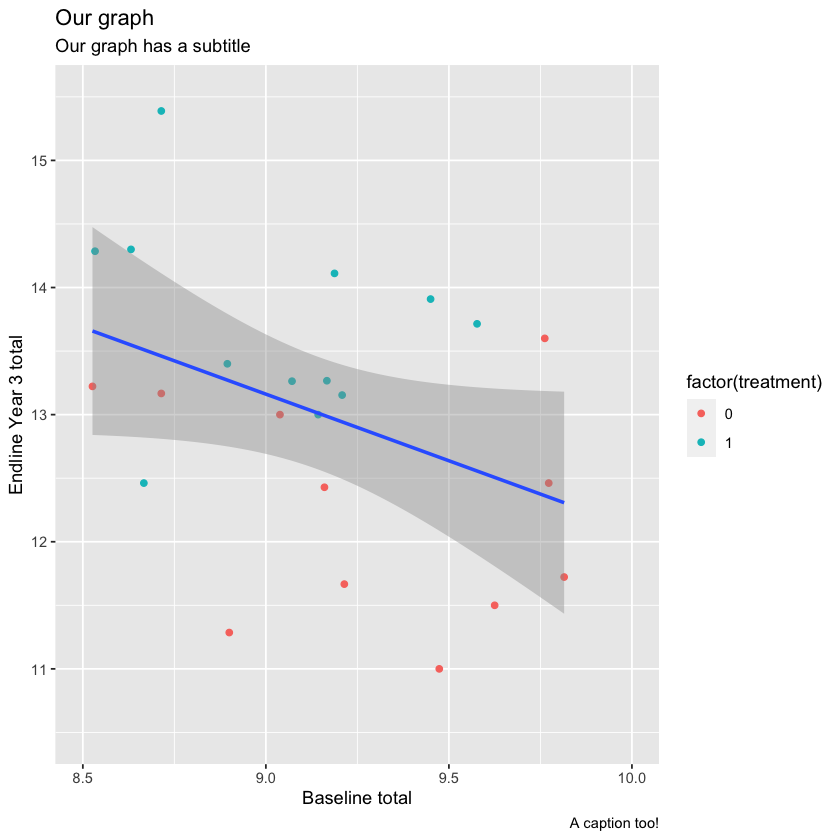

In [11]:
plot2 + 
    scale_x_continuous(limits = c(8.5, 10)) +
    scale_y_continuous(limits = c(10.5, 15.5))

Two completely different graphs!   
<br>
<br>
By using `coord_cartesian`, we are able to *zoom in* to the graph. However, if we use `scale_x_continuous` (or `scale_y_continuous`), we are *limiting* the data points being be plotted. Consequently, the fitted line and its accompanying CI envelope also changes. So if you are only interested in zooming in to a specific range of the graph, we recommend using `coord_cartesian`. 

<br>

However if you are interested in *zooming out*, both options will work in the same way.

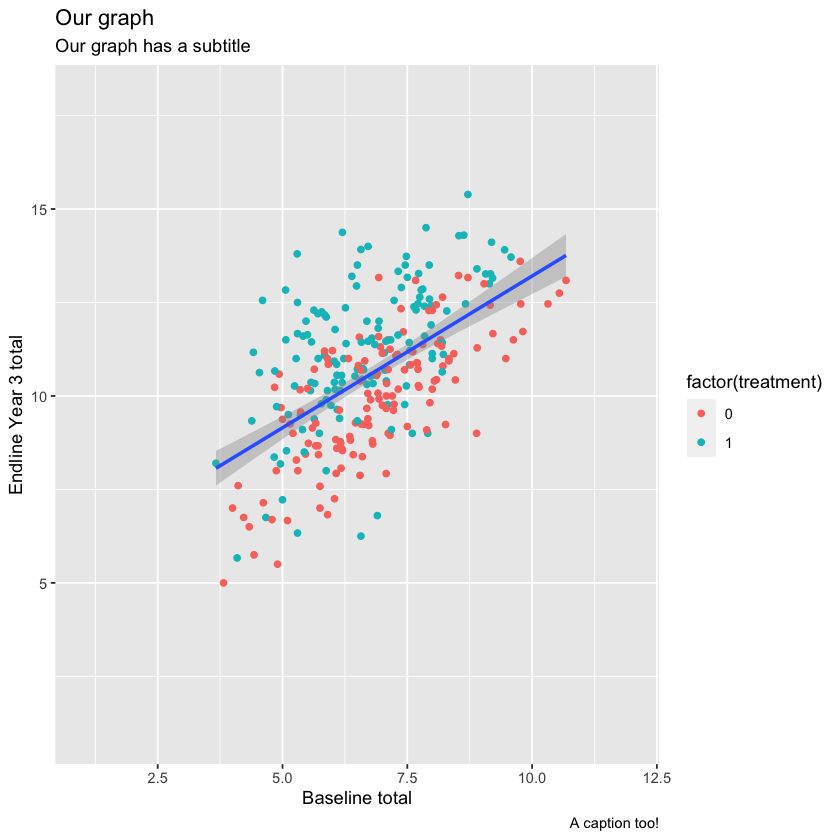

In [12]:
plot2 + 
    coord_cartesian(xlim = c(1, 12),
                    ylim = c(1, 18))

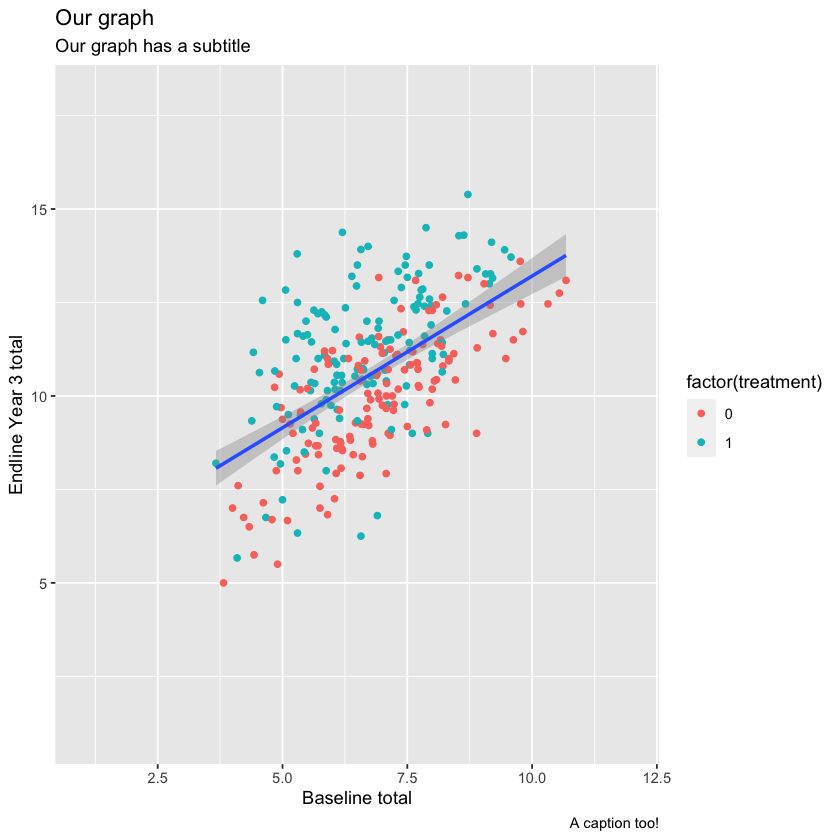

In [13]:
plot2 + 
    scale_x_continuous(limits = c(1, 12)) +
    scale_y_continuous(limits = c(1, 18))

<div class="alert alert-block alert-info">

**Tip**: You will find examples in the data visualization library where `scale_x_continuous` and `scale_y_continuous` have been used to *zoom out*. 

</div>

#### **Legend**

Whenever an aesthetic mapping is provided, `ggplot` automatically associates it with __exactly__ one *scale*. To explain this better, let us revisit the code used to create `plot1`:

```r
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)
```
`ggplot` adds default scales equivalent to:

```r
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
            scale_x_continuous() +
            scale_y_continuous() +
            scale_color_discrete()
```
Let's execute and verify that they are indeed the same.

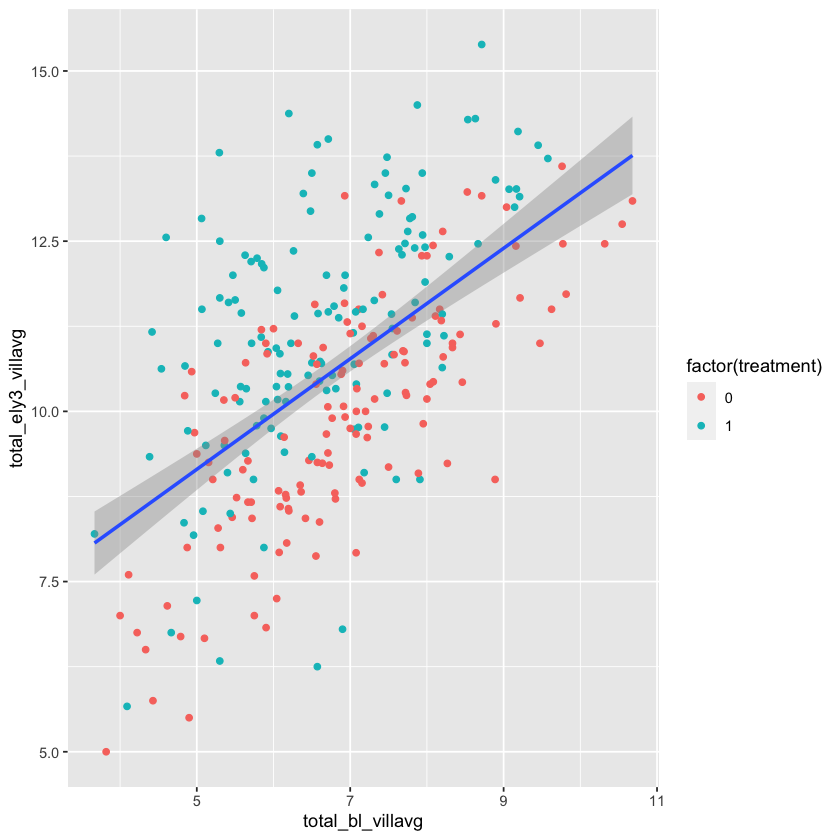

In [14]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

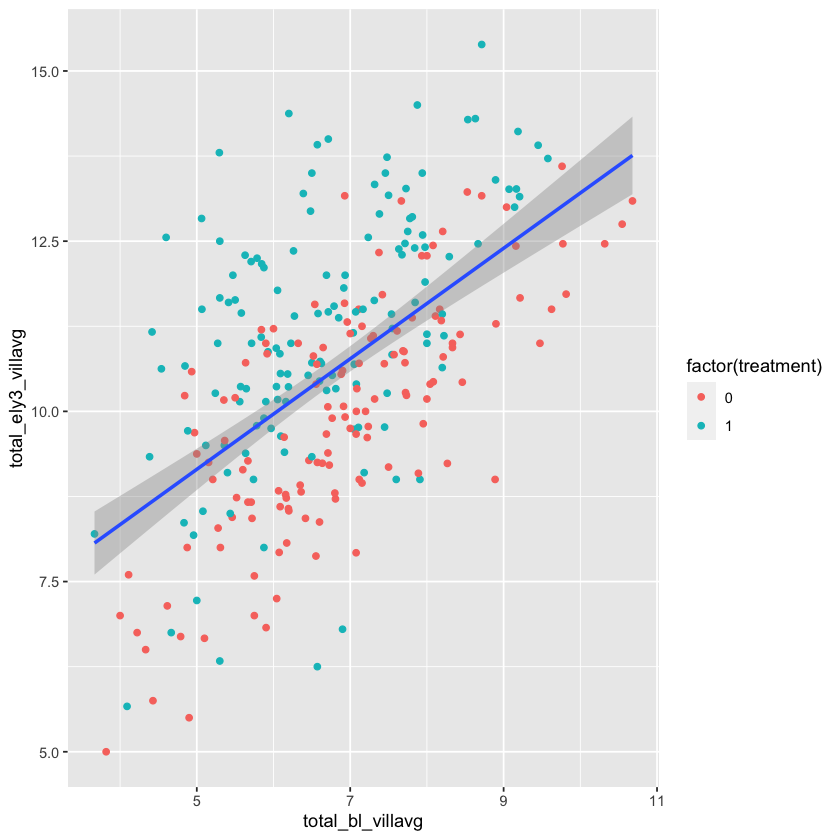

In [15]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
            scale_x_continuous() +
            scale_y_continuous() +
            scale_color_discrete()

```R
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
            scale_x_continuous() +
            scale_y_continuous() +
            scale_color_discrete()
```
In this code block, aesthetic mappings have been used 3 times:
1. `x = total_bl_villavg`: corresponding to `scale_x_continuous()`
2. `y = total_ely3_villavg`: corresponding to `scale_y_continuous()`
3. `color = factor(treatment)`: corresponding to `scale_color_discrete()`

But what does this have to do with legends?
<br>
<br>

Every scale is associated with a guide that displays the relationship between the aesthetic (`x`, `y`, `color`, `fill`, `shape`, `size`, etc.) and the data. Positional scales are displayed using the axes. For color scales, this role is performed through a legend. Hence, to modify the legend, we need to use `scale_color_discrete`. Why discrete? Because the `color` aesthetic is mapped to a factor variable. Let's see what happens if we remove the `factor()` function:

ERROR while rich displaying an object: Error: Continuous value supplied to discrete scale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(ob

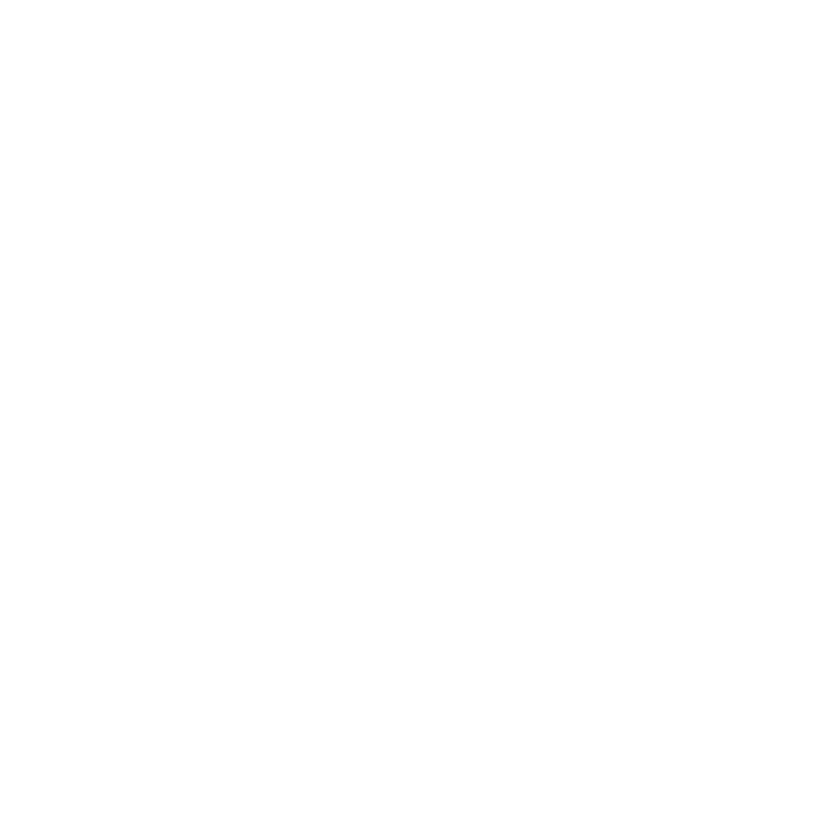

In [16]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = treatment), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
            scale_x_continuous() +
            scale_y_continuous() +
            scale_color_discrete()

We get an error saying that continuous values have been supplied to a discrete value. To fix this, we will need to use `scale_color_continuous` as shown here:

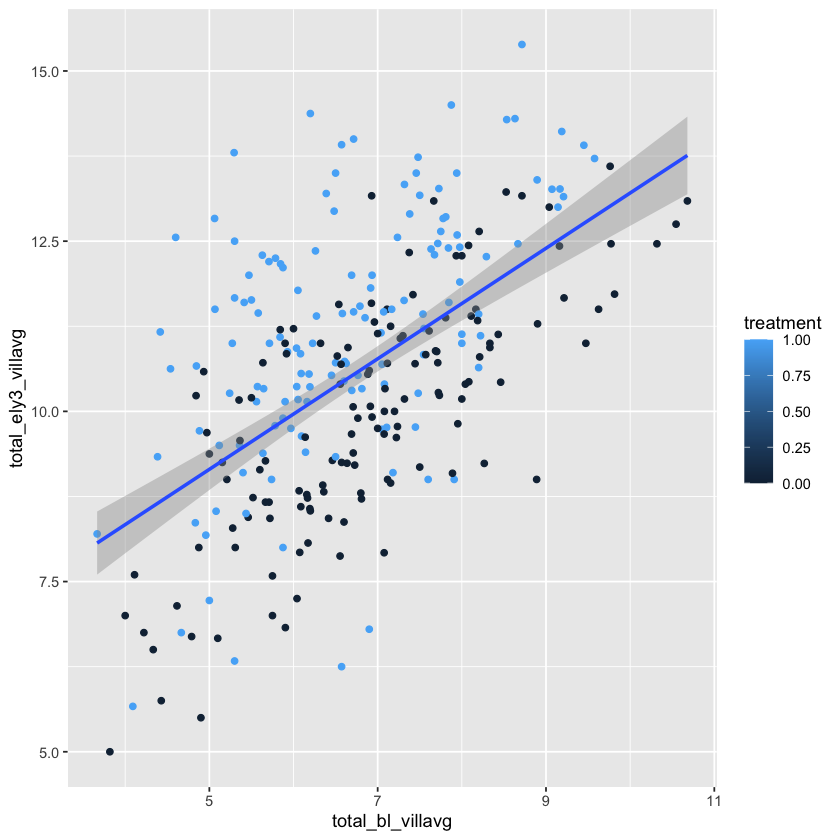

In [17]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(aes(color = treatment), na.rm = TRUE) +
            geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
            scale_x_continuous() +
            scale_y_continuous() +
            scale_color_continuous()

Now that we have cleared up the link between the legend and the aesthetic mappings, let us explore a few common visual modifications. 
<br>
<br>

Being the default option, `scale_color_discrete` does not offer a lot of customization options and hence, we will be using [**`scale_color_manual`**](https://ggplot2.tidyverse.org/reference/scale_manual.html).  
<br>
**`values` for changing the color of the legend levels**

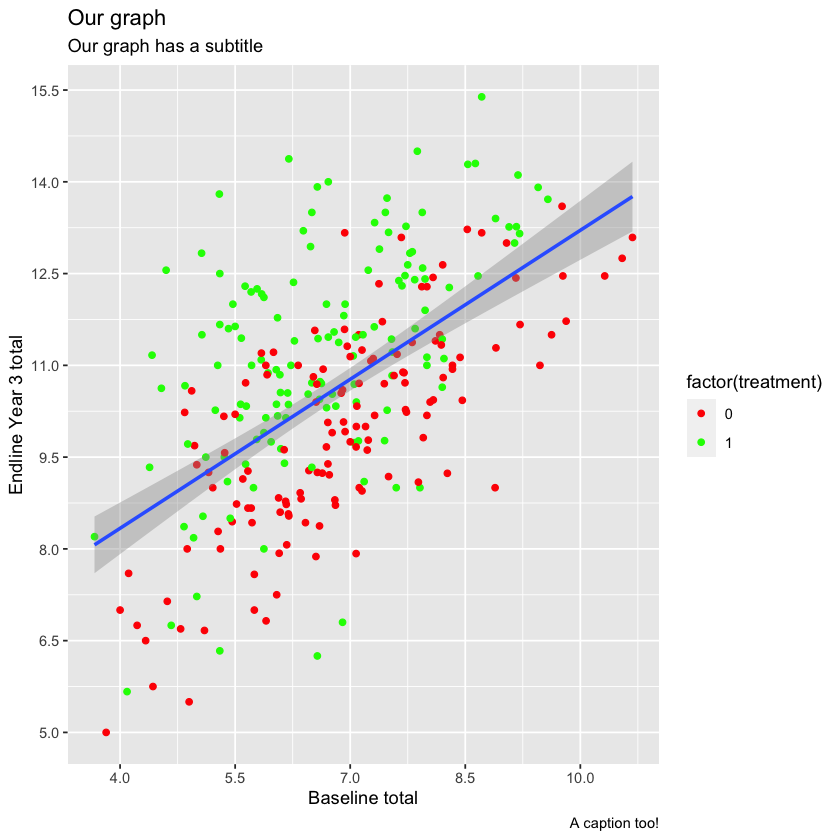

In [23]:
plot3 +
    scale_color_manual(values = c("red", "green"))

The treatment variable has only two possible values, 0 and 1, which are easy to track and you can write down the `values` directly. However, if there were multiple levels, for example different treatment arms, keeping track of each level would be difficult. In such situations, it is recommended to use a named vector. 

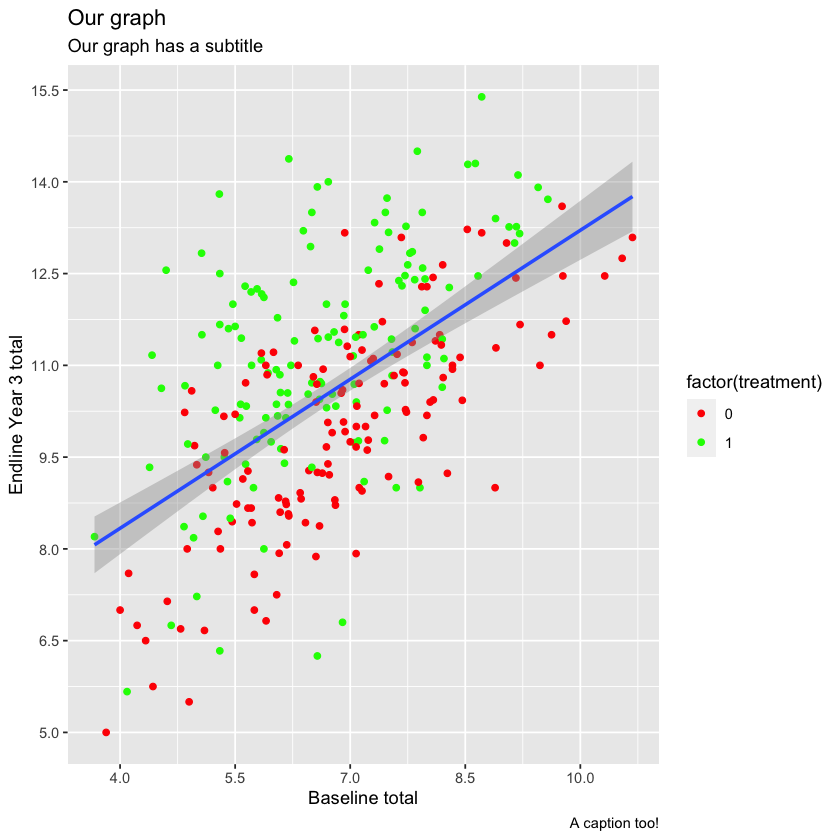

In [31]:
colors <- c("0" = "red", "1" = "green")

plot3 + 
    scale_color_manual(values = colors)

**`labels` for changing the legend key text**

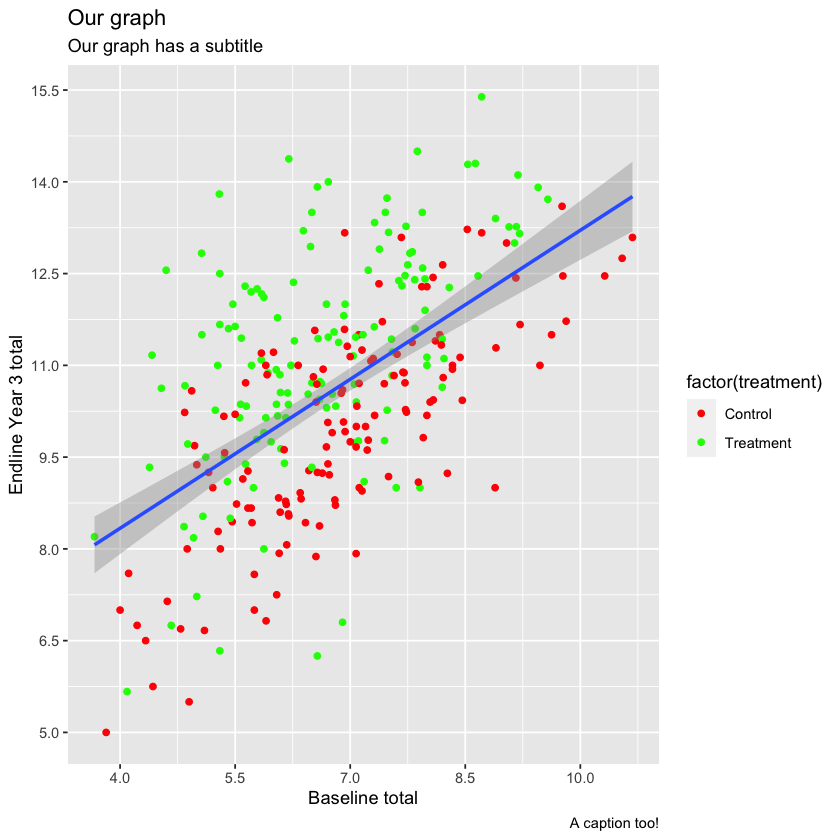

In [34]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = c("Control", "Treatment"))

But as with the colors, here too, it is recommend to store the labels in a vector so that you can keep track of them.

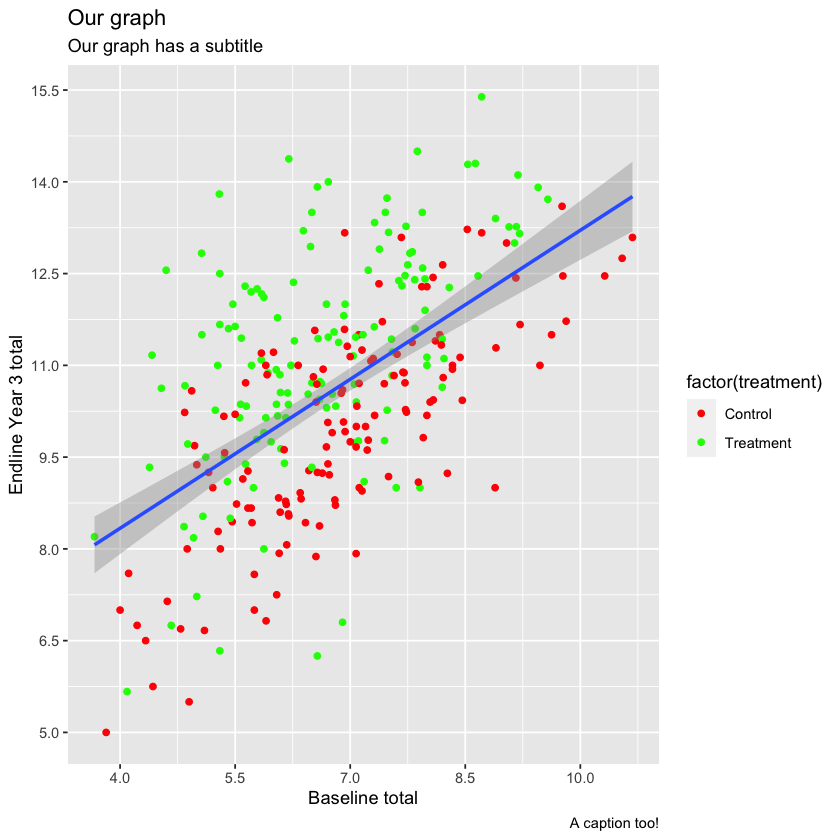

In [35]:
labs <- c("1" = "Treatment", "0" = "Control")

plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs)

**`breaks` for changing which which keys get displayed**
<br>
<br>
Please note that the number of labels must match the number of breaks. In the following example, since we are showing only key, we must also pass on one label. 

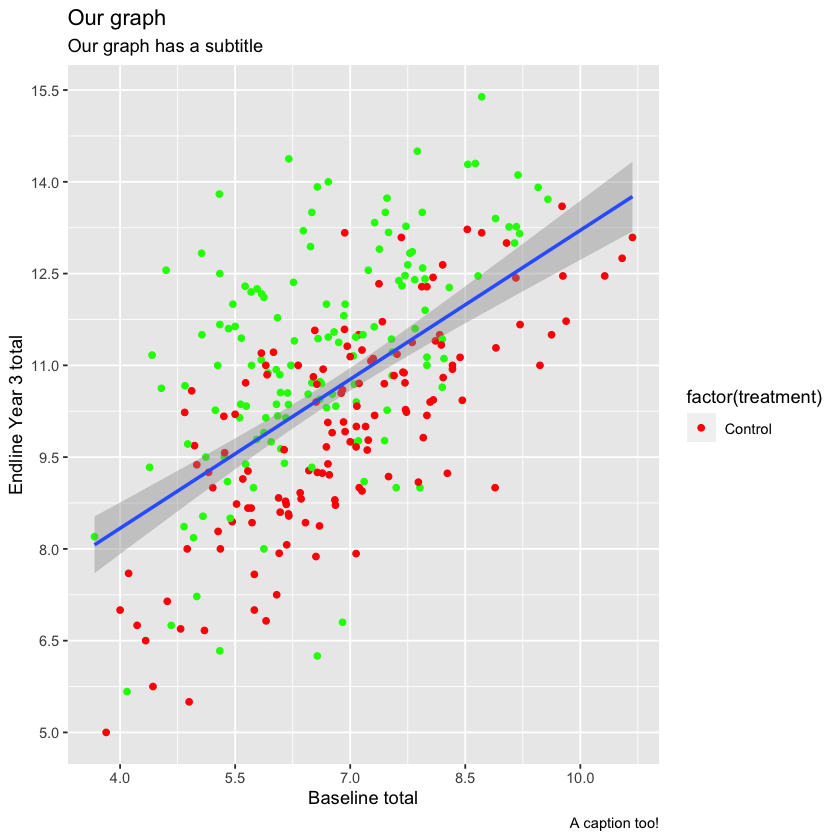

In [42]:
labs1 <- c("0" = "Control")

plot3 + scale_color_manual(values = colors,
                           labels = labs1, 
                           breaks = c("0"))

**`limits` to change the possible values of the scale**
<br>
<br>
Note the difference between `breaks` and `limits`!

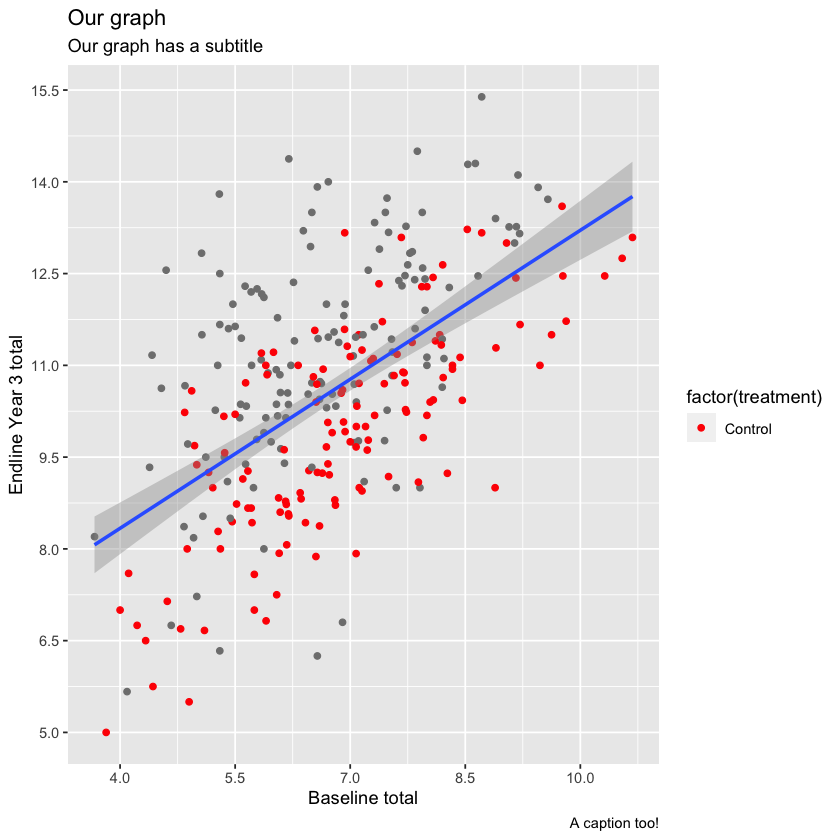

In [60]:
labs <- c("1" = "Treatment", "0" = "Control")

plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs,
                       limits = c("0"))

`limits` can also be used to change the order of the legend keys. 

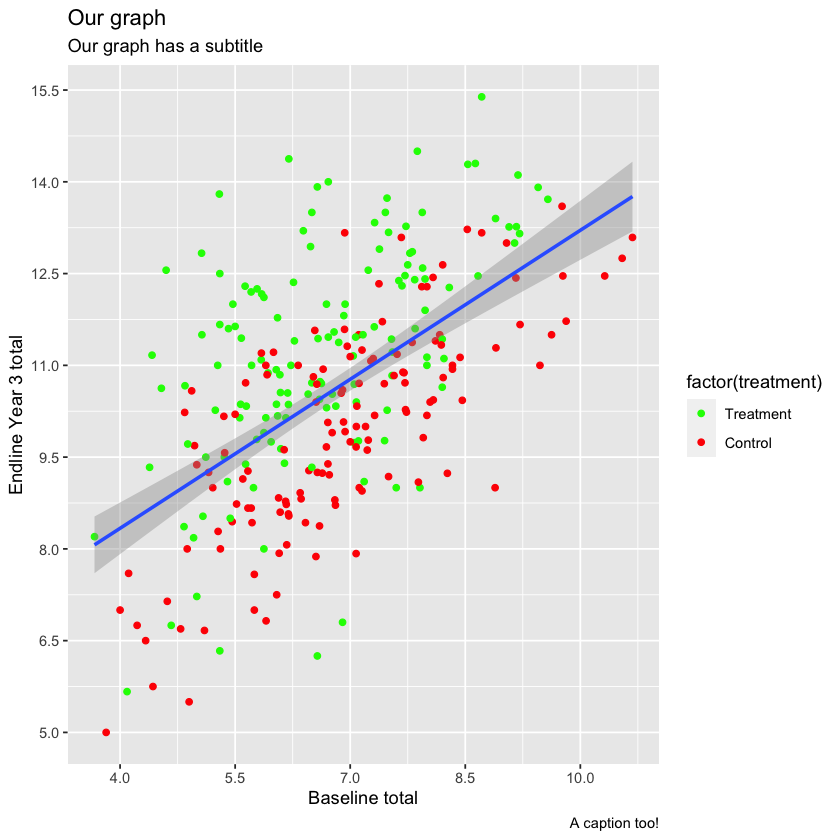

In [63]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs,
                       limits = c("1", "0")) 

**[`guides`](https://ggplot2.tidyverse.org/reference/guides.html) layer to reverse the order of the legend**

<br>
Useful for quickly reversing the order as you don't have to specify the position of each manually. 

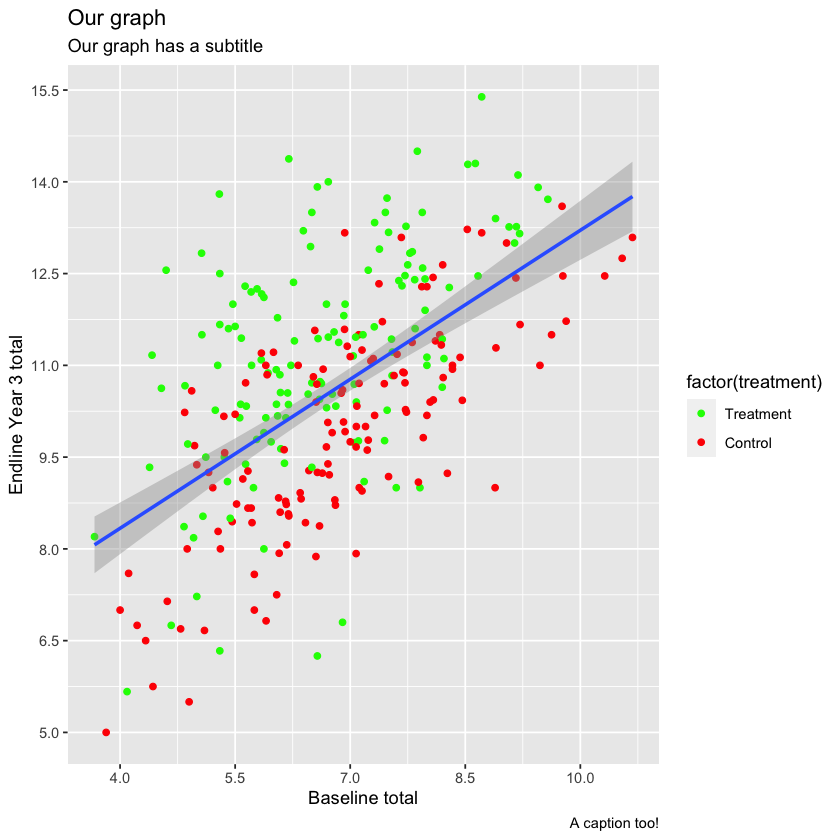

In [44]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs) +
    guides(color = guide_legend(reverse = TRUE))

**`name` to change the legend title**

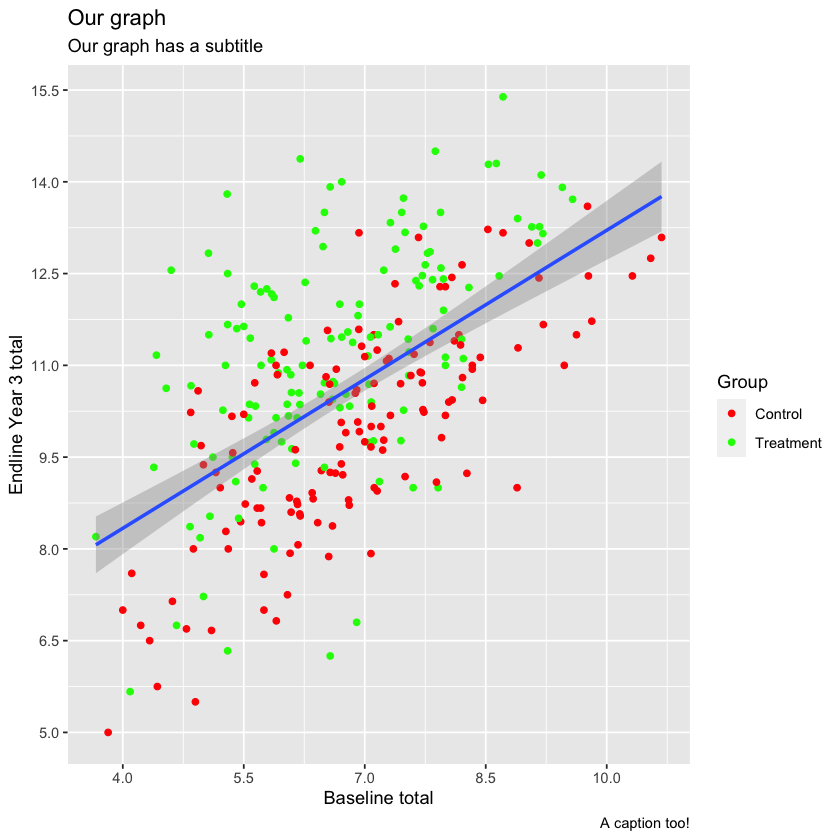

In [47]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs,
                       name = "Group")

You can also use the `guides` layer to change the legend title

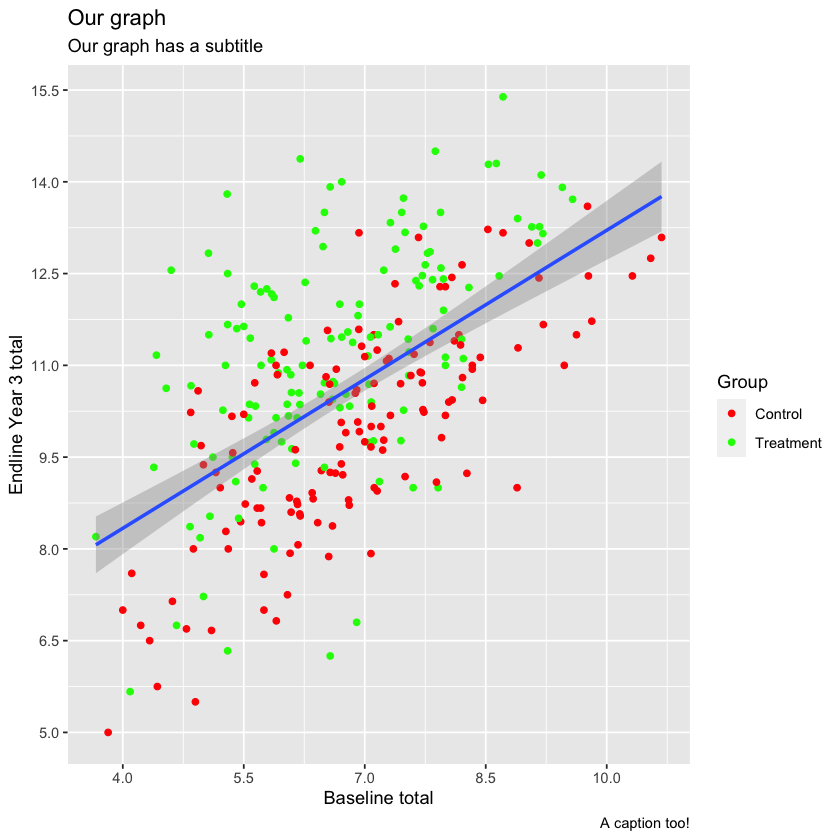

In [49]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs) + 
    guides(color = guide_legend(title = "Group"))

Alternatively, you can also use the `labs` layer.

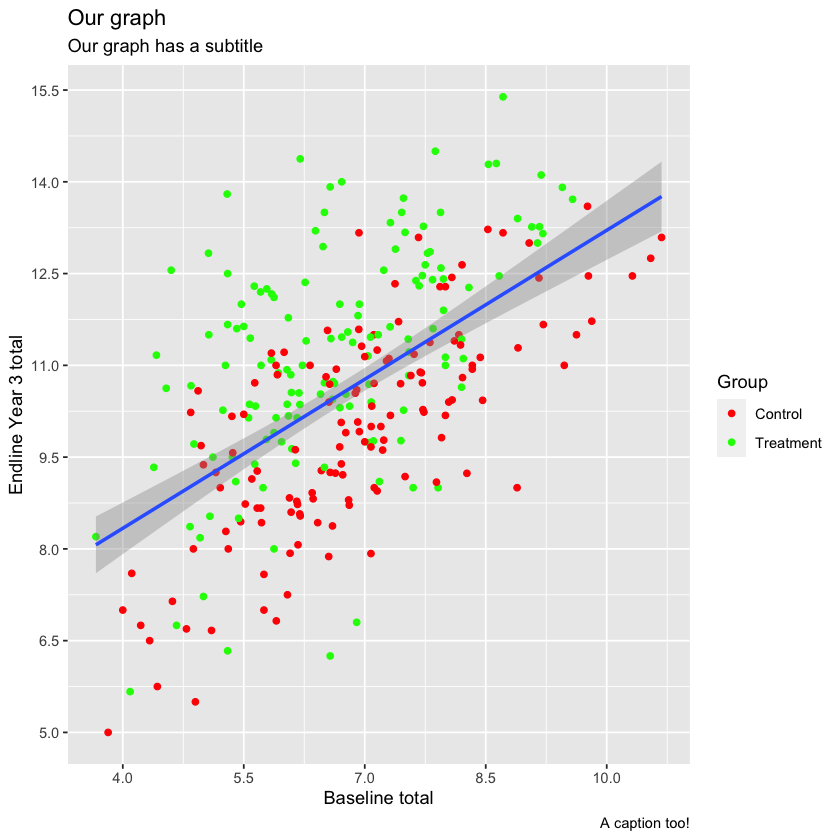

In [54]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs) + 
    labs(color = "Group")

If you use `labs`, `name` and `guides` at the same time, the latter will be applied.  

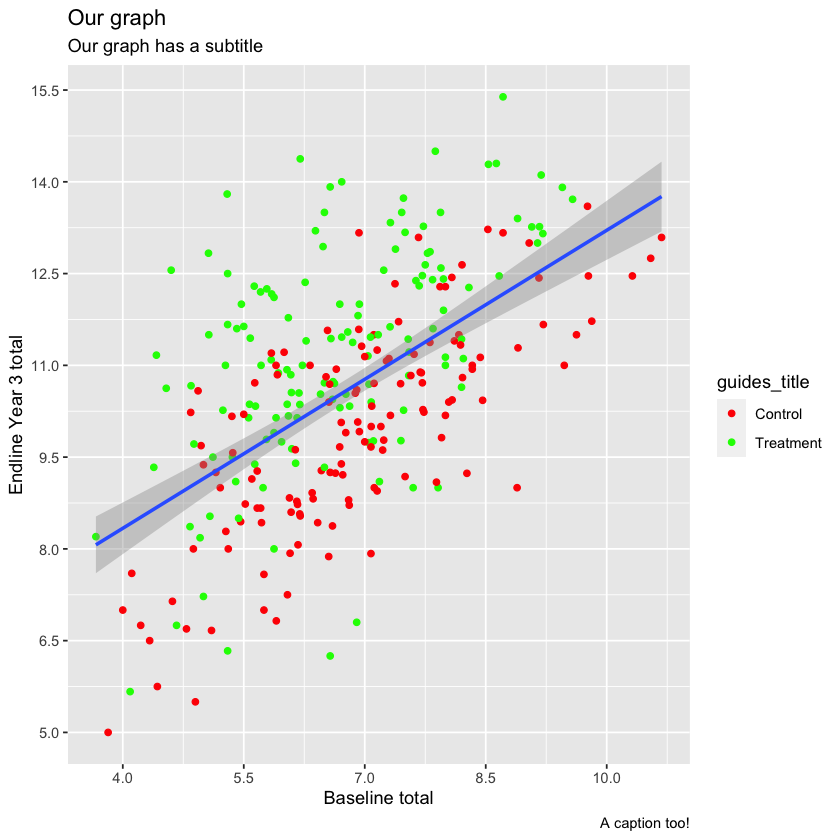

In [56]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs,
                       name = "name_title") + 
    guides(color = guide_legend(title = "guides_title")) +
    labs(color = "labs_title")

And of course, the order in which you write the layers don't matter.

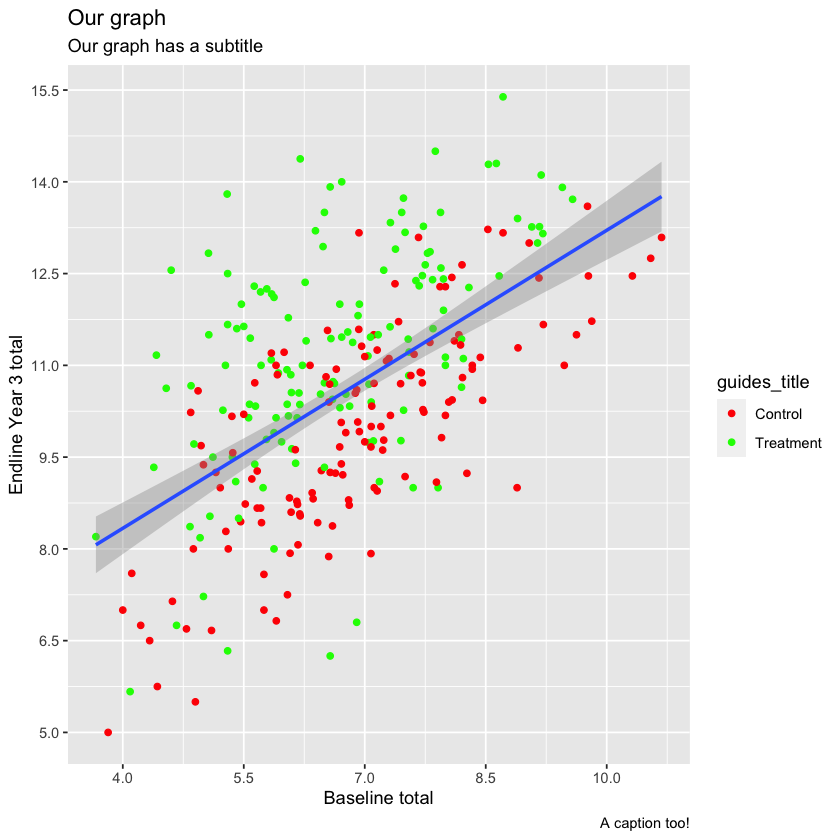

In [65]:
plot3 + 
    labs(color = "labs_title") +
    guides(color = guide_legend(title = "guides_title")) + 
    scale_color_manual(values = colors, 
                       labels = labs,
                       name = "name_title")
    

We would recommend using the `name` attribute of the `scale` layer since it is likely that you will be coding that out regardless. 

**`guides` to remove a legend**

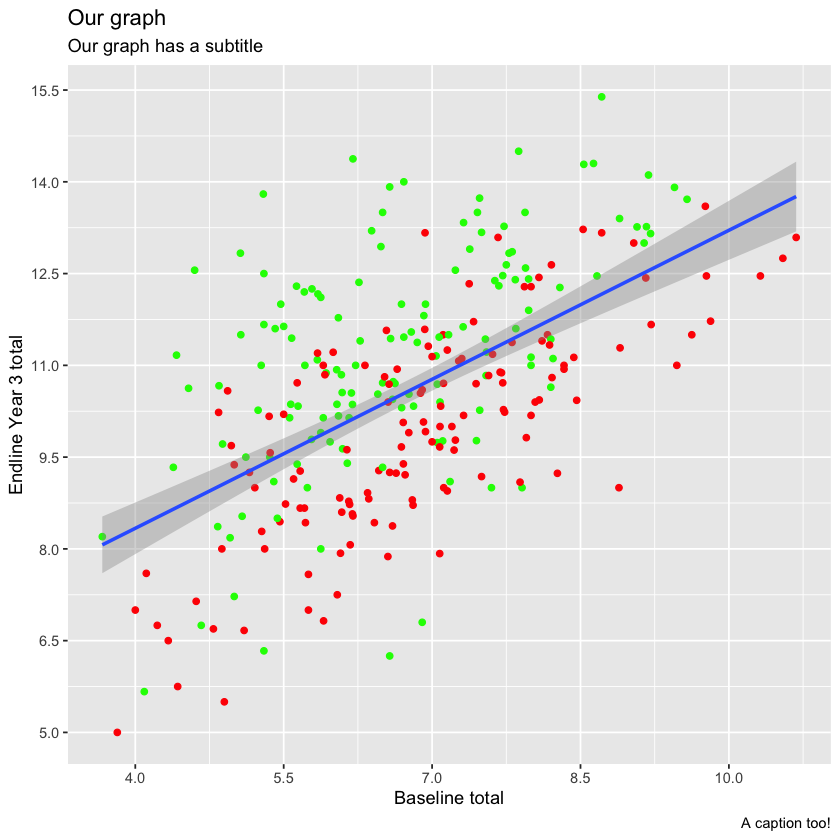

In [67]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs) + 
    guides(color = "none")

Alternatively, you can also use the `guide` attribute from the `scale` layer to remove the legend. 

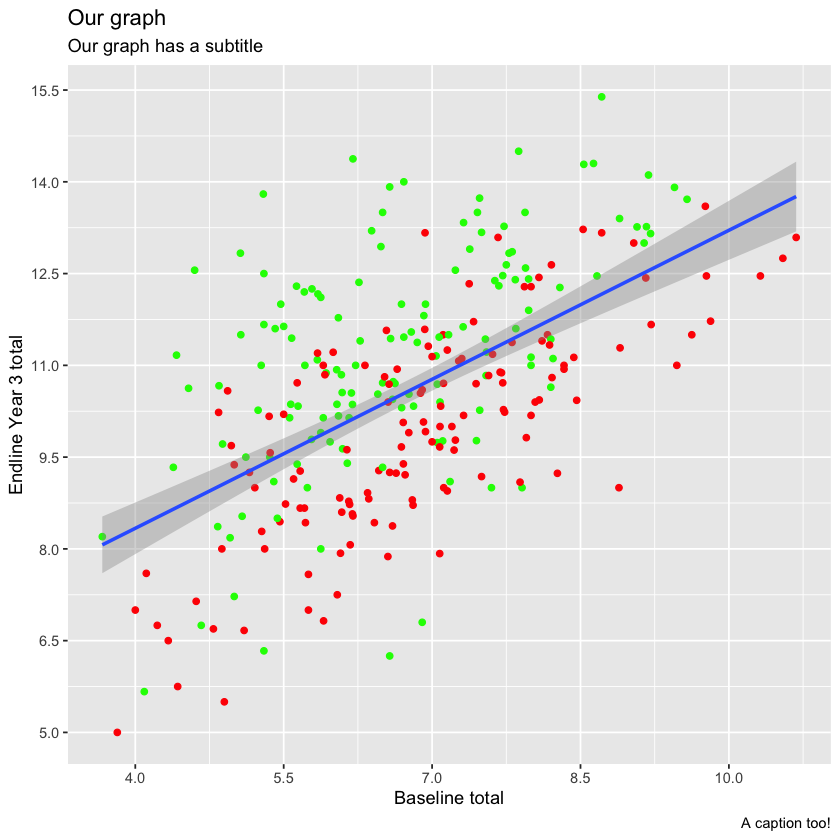

In [116]:
plot3 + 
    scale_color_manual(values = colors, 
                       labels = labs,
                       guide = "none") 

**What if there is more than 1 legend?**
<br>

In our graph, we have used the `color` aesthetic mapping to distinguish the points between the treatment and control groups. As discussed previously, each aesthetic is linked to a scale. The `color` aesthetic produces a legend. Now suppose we had another aesthetic mapping, `shape` to denote the district of each point. 

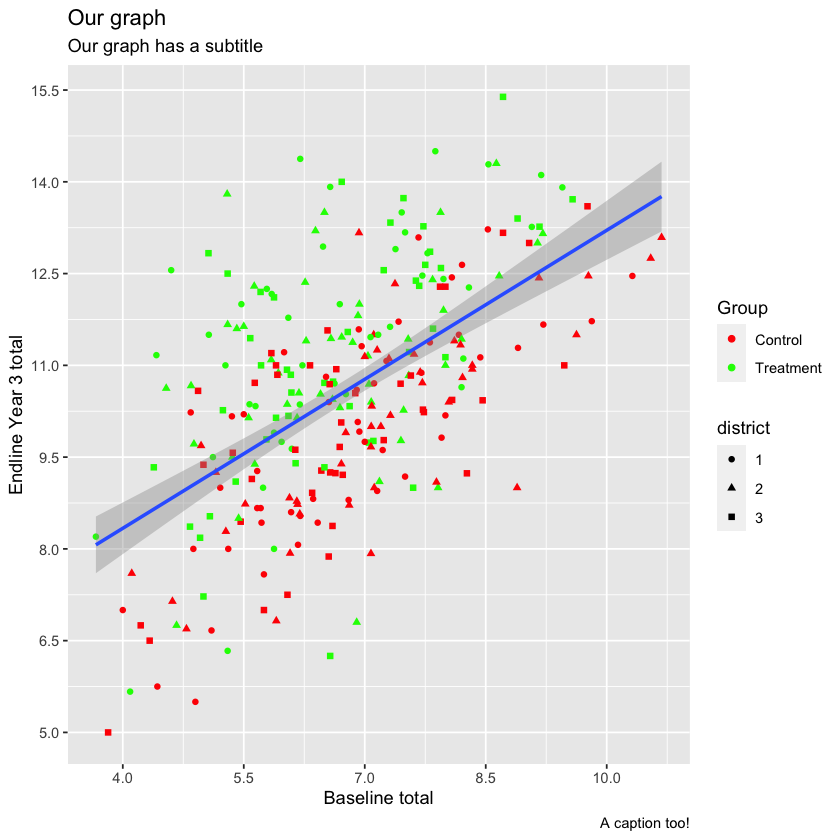

In [98]:
plot4 <- ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
                geom_point(aes(color = factor(treatment), shape = district), na.rm = TRUE) +
                geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) + 
                scale_x_continuous(breaks = seq(from = 4, to = 12, by = 1.5)) +
                scale_y_continuous(breaks = seq(from = 5, to = 16, by = 1.5)) + 
                scale_color_manual(values = colors, 
                                   labels = labs,
                                   name = "Group") + 
                labs(title = "Our graph",
                     subtitle = "Our graph has a subtitle",
                     caption = "A caption too!",
                     x = "Baseline total",
                     y = "Endline Year 3 total")
plot4

With the addition of the `shape` aesthetic mapping, `ggplot` adds a legend as well. We can manipulate this scale and legend using the [**`scale_shape_manual`**](https://ggplot2.tidyverse.org/reference/scale_manual.html) layer. 

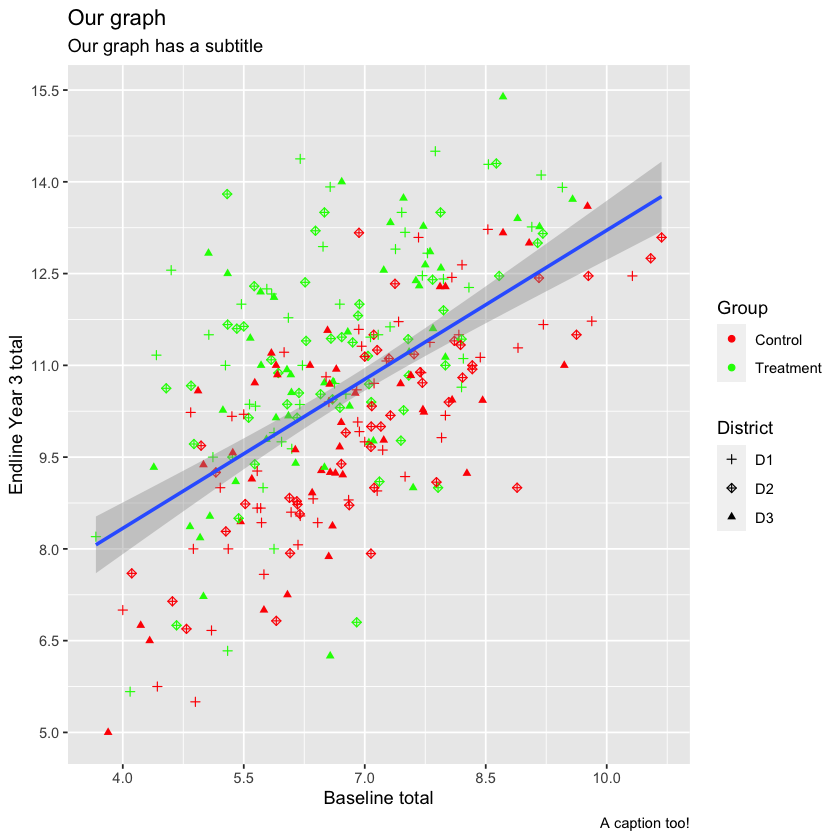

In [107]:
labs_district <- c("1" = "D1", "2" = "D2", "3" = "D3")

plot4 + scale_shape_manual(values = c(3, 9, 17),
                           name = "District", 
                           labels = labs_district)

In the code block above, we have use the following attributes in the `scale_shape_manual` layer:
* `values`: to change the shapes
* `name`: to change the name of the legend for this scale
* `labels`: tp change the legend key text

The functionality is similar to `scale_color_manual`. The `guides` layer works as anticipated: 

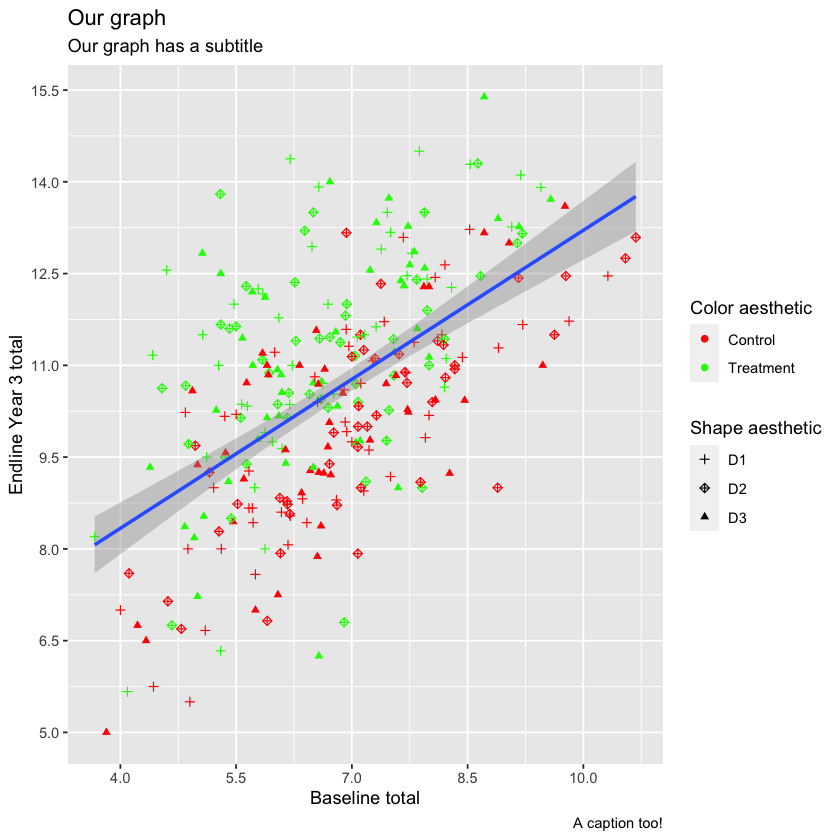

In [108]:
labs_district <- c("1" = "D1", "2" = "D2", "3" = "D3")

plot4 + scale_shape_manual(values = c(3, 9, 17),
                           name = "District", 
                           labels = labs_district) + 
        guides(color = guide_legend(title = "Color aesthetic"),
               shape = guide_legend(title = "Shape aesthetic"))

`guides` can be used to selectively remove one legend. 

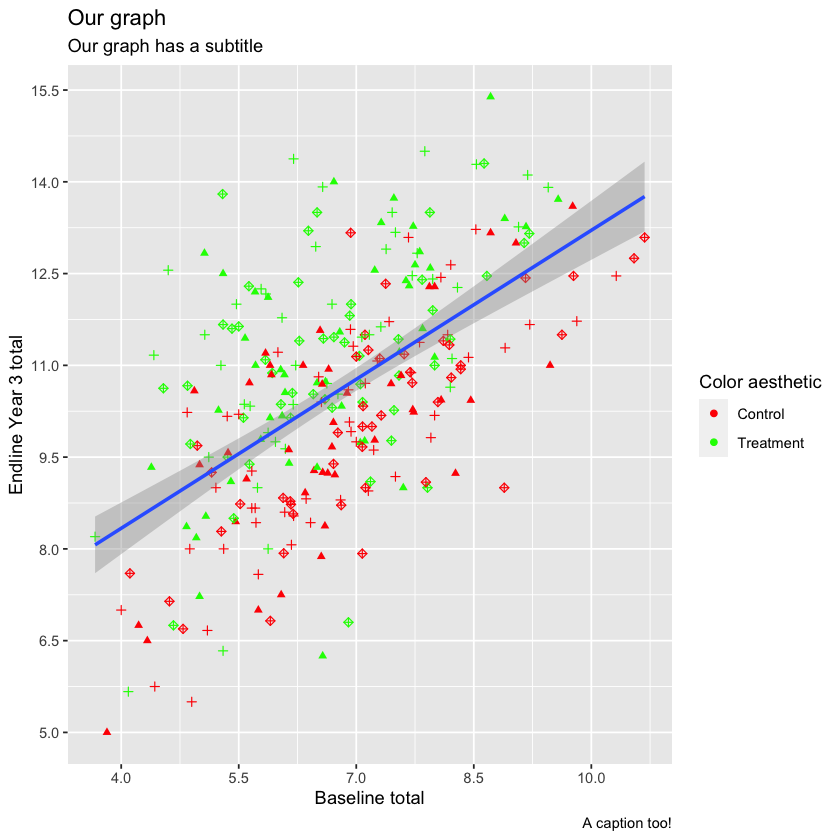

In [109]:
labs_district <- c("1" = "D1", "2" = "D2", "3" = "D3")

plot4 + scale_shape_manual(values = c(3, 9, 17),
                           name = "District", 
                           labels = labs_district) + 
        guides(color = guide_legend(title = "Color aesthetic"),
               shape = "none")

`guides` can also be used to change the order of the legends. 

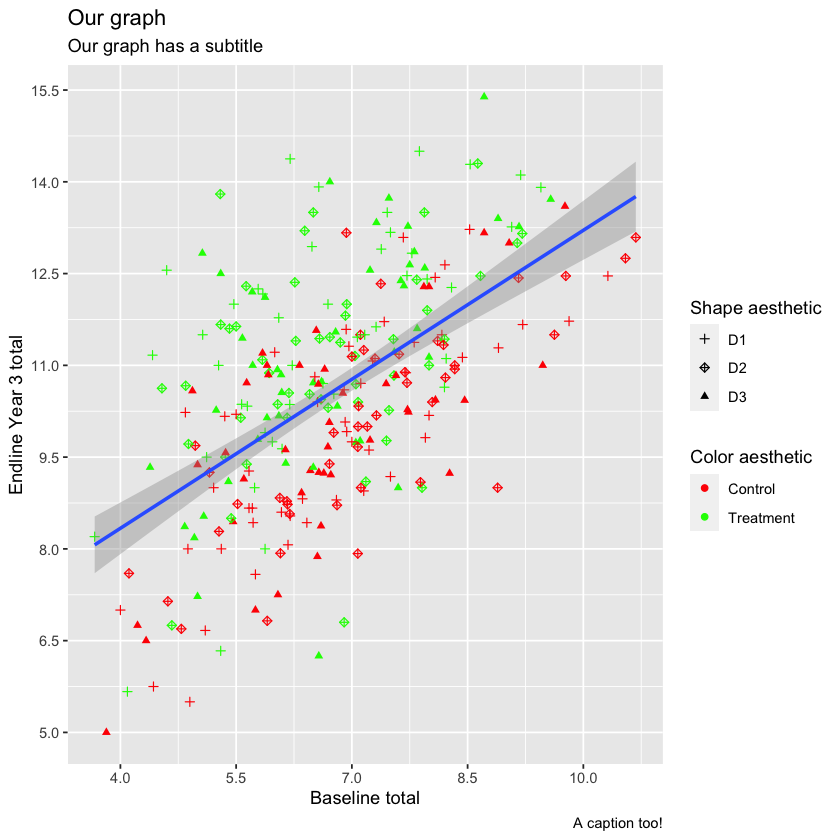

In [117]:
labs_district <- c("1" = "D1", "2" = "D2", "3" = "D3")

plot4 + scale_shape_manual(values = c(3, 9, 17),
                           name = "District", 
                           labels = labs_district) + 
        guides(color = guide_legend(title = "Color aesthetic", 
                                    order = 2),
               shape = guide_legend(title = "Shape aesthetic",
                                    order = 1,
                                    position = "bottom"))

Scales can get confusing, given the number of options you can choose from. This [Stackoverflow article](https://stackoverflow.com/questions/70942728/understanding-color-scales-in-ggplot2) details the different options available, how they differ and their suggested usage. 

to do 
* number of columns and rows
* changing the position of legends independently is very difficult and not worth trying
* add examples of legend formatting